In [238]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

import random
import math
import time
import datetime
import operator

In [239]:
plt.style.use('fivethirtyeight')
%matplotlib inline

# Import Datasets

In [240]:
confirmed_cases = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/bda67e3db0e8dca4540297633d431a8021c035c8/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27


In [241]:
deaths_reported = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/bda67e3db0e8dca4540297633d431a8021c035c8/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30,33,36,36,40,42,43,47,50,57
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,26,27,27,27,27,28,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,367,375,384,392,402,407,415,419,425,432
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,35,36,37,37,37,37,40,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [242]:
recovered_cases = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/bda67e3db0e8dca4540297633d431a8021c035c8/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,112,131,135,150,166,179,188,188,207,220
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,302,314,327,345,356,385,394,403,410,422
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,894,1047,1099,1152,1204,1355,1408,1479,1508,1558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,205,235,248,282,309,333,344,344,344,385
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6


In [245]:
# retrieved from daily reports
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/bda67e3db0e8dca4540297633d431a8021c035c8/csse_covid_19_data/csse_covid_19_daily_reports/04-27-2020.csv')
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-28 02:30:51,34.223334,-82.461707,29,0,0,29,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-28 02:30:51,30.295065,-92.414197,130,9,0,121,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-28 02:30:51,37.767072,-75.632346,195,3,0,192,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-28 02:30:51,43.452658,-116.241552,650,15,0,635,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-28 02:30:51,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


# Column Info

In [246]:
# fetch all columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/20', '4/23/20',
       '4/24/20', '4/25/20', '4/26/20', '4/27/20'],
      dtype='object', length=101)

In [247]:
# extract the date columns
confirmed = confirmed_cases.loc[:, cols[4] : cols[-1]]
deaths = deaths_reported.loc[:, cols[4] : cols[-1]]
recoveries = recovered_cases.loc[:, cols[4] : cols[-1]]

In [248]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,0,0,0,0,0,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,0,0,0,0,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
2,0,0,0,0,0,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,0,0,0,0,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
4,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,5,5,5,6,6
261,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


# Filter Countries


In [249]:
dates = confirmed.keys()

# across all countries
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

# country specific cases
china_cases = []
india_cases = []
us_cases = []
brazil_cases = []
russia_cases = []

# country specific deaths
china_deaths = []
india_deaths = []
us_deaths = []
brazil_deaths = []
russia_deaths = []

# country specific recoveries
china_recoveries = []
india_recoveries = []
us_recoveries = []
brazil_recoveries = []
russia_recoveries = []

In [250]:
for i in dates:
    # fetch info from all countries based on this date
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # append information above to respective list    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum - death_sum - recovered_sum)    
    mortality_rate.append(death_sum / confirmed_sum)
    recovery_rate.append(recovered_sum / confirmed_sum)
    
    # find the total confirmed cases for this date matching with the respective country    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'China'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'India'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'US'][i].sum())
    brazil_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Brazil'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'Russia'][i].sum())
    
    # find the total reported deaths for this date matching with the respective country    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'China'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'India'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'US'][i].sum())
    brazil_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'Brazil'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'Russia'][i].sum())
    
    # find the total recovered cases for this date matching with the respective country    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'China'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'India'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'US'][i].sum())
    brazil_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Brazil'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'Russia'][i].sum())    

In [251]:
# print out the world cases for each date
number_list = [ f"{dates[i]} : {world_cases[i]}" for i in range(len(dates)) ]
number_list

['1/22/20 : 555',
 '1/23/20 : 654',
 '1/24/20 : 941',
 '1/25/20 : 1434',
 '1/26/20 : 2118',
 '1/27/20 : 2927',
 '1/28/20 : 5578',
 '1/29/20 : 6166',
 '1/30/20 : 8234',
 '1/31/20 : 9927',
 '2/1/20 : 12038',
 '2/2/20 : 16787',
 '2/3/20 : 19881',
 '2/4/20 : 23892',
 '2/5/20 : 27635',
 '2/6/20 : 30794',
 '2/7/20 : 34391',
 '2/8/20 : 37120',
 '2/9/20 : 40150',
 '2/10/20 : 42762',
 '2/11/20 : 44802',
 '2/12/20 : 45221',
 '2/13/20 : 60368',
 '2/14/20 : 66885',
 '2/15/20 : 69030',
 '2/16/20 : 71224',
 '2/17/20 : 73258',
 '2/18/20 : 75136',
 '2/19/20 : 75639',
 '2/20/20 : 76197',
 '2/21/20 : 76819',
 '2/22/20 : 78572',
 '2/23/20 : 78958',
 '2/24/20 : 79561',
 '2/25/20 : 80406',
 '2/26/20 : 81388',
 '2/27/20 : 82746',
 '2/28/20 : 84112',
 '2/29/20 : 86011',
 '3/1/20 : 88369',
 '3/2/20 : 90306',
 '3/3/20 : 92840',
 '3/4/20 : 95120',
 '3/5/20 : 97886',
 '3/6/20 : 101801',
 '3/7/20 : 105847',
 '3/8/20 : 109821',
 '3/9/20 : 113590',
 '3/10/20 : 118620',
 '3/11/20 : 125875',
 '3/12/20 : 128352',
 '3/

In [252]:
print(f"Confirmed sum: {confirmed_sum:,}")
print(f"Death sum: {death_sum:,}")
print(f"Recovered sum: {recovered_sum:,}")

Confirmed sum: 3,041,764
Death sum: 211,167
Recovered sum: 893,967


In [253]:
print(f"China cases: {china_cases}")

China cases: [548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 11891, 16630, 19716, 23707, 27440, 30587, 34110, 36814, 39829, 42354, 44386, 44759, 59895, 66358, 68413, 70513, 72434, 74211, 74619, 75077, 75550, 77001, 77022, 77241, 77754, 78166, 78600, 78928, 79356, 79932, 80136, 80261, 80386, 80537, 80690, 80770, 80823, 80860, 80887, 80921, 80932, 80945, 80977, 81003, 81033, 81058, 81102, 81156, 81250, 81305, 81435, 81498, 81591, 81661, 81782, 81897, 81999, 82122, 82198, 82279, 82361, 82432, 82511, 82543, 82602, 82665, 82718, 82809, 82883, 82941, 83014, 83134, 83213, 83306, 83356, 83403, 83760, 83787, 83805, 83817, 83853, 83868, 83884, 83899, 83909, 83912, 83918]


# Daily Increase

In [254]:
def daily_increase(data):
    res = []
    for i in range(len(data)):
        res.append(data[0]) if i == 0 else res.append(data[i] - data[i - 1])
    return res

In [255]:
# find daily cases increase in the world and our countries
world_daily_cases_increase = daily_increase(world_cases)
china_daily_cases_increase = daily_increase(china_cases)
india_daily_cases_increase = daily_increase(india_cases)
us_daily_cases_increase = daily_increase(us_cases)
brazil_daily_cases_increase = daily_increase(brazil_cases)
russia_daily_cases_increase = daily_increase(russia_cases)

In [256]:
world_daily_cases_increase

[555,
 99,
 287,
 493,
 684,
 809,
 2651,
 588,
 2068,
 1693,
 2111,
 4749,
 3094,
 4011,
 3743,
 3159,
 3597,
 2729,
 3030,
 2612,
 2040,
 419,
 15147,
 6517,
 2145,
 2194,
 2034,
 1878,
 503,
 558,
 622,
 1753,
 386,
 603,
 845,
 982,
 1358,
 1366,
 1899,
 2358,
 1937,
 2534,
 2280,
 2766,
 3915,
 4046,
 3974,
 3769,
 5030,
 7255,
 2477,
 16867,
 10897,
 11350,
 14137,
 15510,
 17733,
 27770,
 29631,
 32308,
 32463,
 41264,
 39797,
 49644,
 61978,
 63722,
 67401,
 59461,
 62205,
 75118,
 75030,
 80820,
 82418,
 80183,
 73678,
 71690,
 75011,
 83762,
 85338,
 92391,
 78096,
 99139,
 70028,
 70389,
 79925,
 96366,
 87851,
 77616,
 83504,
 70916,
 77062,
 75286,
 83635,
 103861,
 86021,
 74739,
 69401]

In [257]:
china_daily_cases_increase

[548,
 95,
 277,
 486,
 669,
 802,
 2632,
 578,
 2054,
 1661,
 2089,
 4739,
 3086,
 3991,
 3733,
 3147,
 3523,
 2704,
 3015,
 2525,
 2032,
 373,
 15136,
 6463,
 2055,
 2100,
 1921,
 1777,
 408,
 458,
 473,
 1451,
 21,
 219,
 513,
 412,
 434,
 328,
 428,
 576,
 204,
 125,
 125,
 151,
 153,
 80,
 53,
 37,
 27,
 34,
 11,
 13,
 32,
 26,
 30,
 25,
 44,
 54,
 94,
 55,
 130,
 63,
 93,
 70,
 121,
 115,
 102,
 123,
 76,
 81,
 82,
 71,
 79,
 32,
 59,
 63,
 53,
 91,
 74,
 58,
 73,
 120,
 79,
 93,
 50,
 47,
 357,
 27,
 18,
 12,
 36,
 15,
 16,
 15,
 10,
 3,
 6]

In [258]:
# find daily death increase in the world and our countries
world_daily_death_increase = daily_increase(total_deaths)
china_daily_death_increase = daily_increase(china_deaths)
india_daily_death_increase = daily_increase(india_deaths)
us_daily_death_increase = daily_increase(us_deaths)
brazil_daily_death_increase = daily_increase(brazil_deaths)
russia_daily_death_increase = daily_increase(russia_deaths)

In [259]:
# find daily recovery increase in the world and our countries
world_daily_recovery_increase = daily_increase(total_recovered)
china_daily_recovery_increase = daily_increase(china_recoveries)
india_daily_recovery_increase = daily_increase(india_recoveries)
us_daily_recovery_increase = daily_increase(us_recoveries)
brazil_daily_recovery_increase = daily_increase(brazil_recoveries)
russia_daily_recovery_increase = daily_increase(russia_recoveries)

# Visualize

In [260]:
# grab all the unique countries
unique_countries = list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Canada',
 'United Kingdom',
 'China',
 'Netherlands',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bis

In [261]:
# find data for each country now
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []
no_cases = []

for i in unique_countries:
    # grab the total number of cases for this country
    cases = latest_data[latest_data['Country_Region'] == i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
# remove the countries which have no cases now
for i in no_cases:
    unique_countries.remove(i)

In [262]:
# sort the countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
unique_countries[0: 5]  # these 5 countries have the most cases

['US', 'Spain', 'Italy', 'France', 'Germany']

In [263]:
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region'] == unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region'] == unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region'] == unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i] / country_confirmed_cases[i])

In [264]:
# create a dataframe and show in a heatmap type table
country_df = pd.DataFrame({
    'Country Name': unique_countries,
    'Number of Confirmed Cases': country_confirmed_cases,
    'Number of Deaths': country_death_cases,
    'Number of Recoveries': country_recovery_cases,
    'Number of Active Cases': country_active_cases,
    'Mortality Rate': country_mortality_rate
})

country_df.style.background_gradient(cmap='Reds')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,988197,56259,111424,820514,0.056931
1,Spain,229422,23521,120832,85069,0.102523
2,Italy,199414,26977,66624,105813,0.135281
3,France,165963,23327,46293,96343,0.140555
4,Germany,158758,6126,114500,38132,0.038587
5,United Kingdom,158348,21157,807,136384,0.133611
6,Turkey,112261,2900,33791,75570,0.025833
7,Iran,91472,5806,70933,14733,0.063473
8,Russia,87147,794,7346,79007,0.009111
9,China,83918,4637,78374,907,0.055256


In [265]:
# similar to unique country, do one for unique provinces
unique_provinces = list(latest_data['Province_State'].unique())
unique_provinces

['South Carolina',
 'Louisiana',
 'Virginia',
 'Idaho',
 'Iowa',
 'Kentucky',
 'Missouri',
 'Oklahoma',
 'Colorado',
 'Illinois',
 'Indiana',
 'Mississippi',
 'Nebraska',
 'Ohio',
 'Pennsylvania',
 'Washington',
 'Wisconsin',
 'Vermont',
 'Minnesota',
 'Florida',
 'North Carolina',
 'California',
 'New York',
 'Wyoming',
 'Michigan',
 'Maryland',
 'Alaska',
 'Kansas',
 'Tennessee',
 'Texas',
 'Maine',
 'Arizona',
 'Georgia',
 'Arkansas',
 'New Jersey',
 'South Dakota',
 'Alabama',
 'West Virginia',
 'North Dakota',
 'Massachusetts',
 'Utah',
 'Montana',
 'New Hampshire',
 'Oregon',
 'New Mexico',
 'Rhode Island',
 'Nevada',
 'District of Columbia',
 'Connecticut',
 'Hawaii',
 'Delaware',
 'Alberta',
 'Anguilla',
 'Anhui',
 'Aruba',
 'Beijing',
 'Bermuda',
 'Bonaire, Sint Eustatius and Saba',
 'British Columbia',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'Chongqing',
 'Curacao',
 'Diamond Princess',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'French Guia

In [266]:
# find data for each province now
province_confirmed_cases = []
province_country = []
province_death_cases = []
province_active_cases = []
province_recovery_cases = []
province_mortality_rate = []
no_cases = []

for i in unique_provinces:
    # grab the total number of cases for this province
    cases = latest_data[latest_data['Province_State'] == i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
# remove the countries which have no cases now
for i in no_cases:
    unique_provinces.remove(i)

In [267]:
# sort the provinces by the number of confirmed cases
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
unique_provinces[0: 5]  # these 5 provinces have the most cases

['New York', 'New Jersey', 'Hubei', 'Massachusetts', 'Illinois']

In [268]:
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State'] == unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Recovered'].sum())
    province_active_cases.append(province_confirmed_cases[i] - province_death_cases[i] - province_recovery_cases[i])
    province_mortality_rate.append(province_death_cases[i] / province_confirmed_cases[i])

In [269]:
# create a dataframe and show in a heatmap type table
province_df = pd.DataFrame({
    'Province/State Name': unique_provinces,
    'Country': province_country,
    'Number of Confirmed Cases': province_confirmed_cases,
    'Number of Recoveries': province_recovery_cases,
    'Number of Active Cases': province_active_cases,
    'Mortality Rate': province_mortality_rate
})

province_df.style.background_gradient(cmap='Blues')

,Province/State Name,Country,Number of Confirmed Cases,Number of Recoveries,Number of Active Cases,Mortality Rate
0,New York,US,291996,0,269328,0.077631
1,New Jersey,US,111188,0,105144,0.054358
2,Hubei,China,68128,63616,0,0.066228
3,Massachusetts,US,56462,0,53459,0.053186
4,Illinois,US,45883,0,43900,0.043219
5,California,US,44966,0,43187,0.039563
6,Pennsylvania,US,43558,0,41672,0.043299
7,Michigan,US,38210,0,34803,0.089165
8,Florida,US,32138,0,31050,0.033854
9,Louisiana,US,27068,0,25328,0.064283


In [270]:
# deal with any missing values: float('nan')
nan_indices = []

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)
        
for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

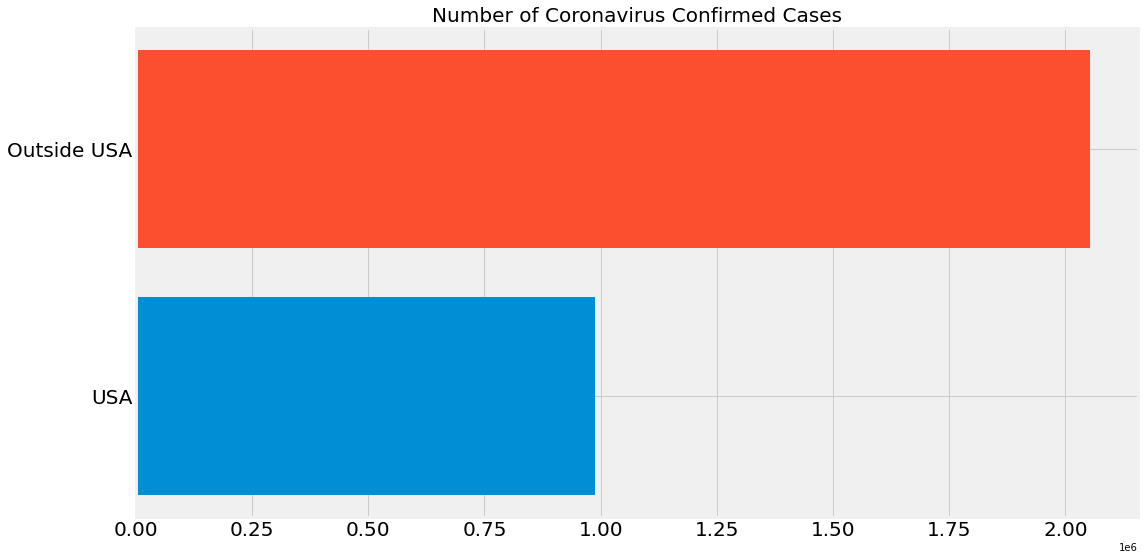

In [271]:
USA_confirmed = latest_data[latest_data['Country_Region'] == 'US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases) - USA_confirmed
plt.figure(figsize=(16,9))
plt.barh('USA', USA_confirmed)
plt.barh('Outside USA', outside_USA_confirmed)
plt.title('Number of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [272]:
print(f"USA cases: {USA_confirmed:,}")
print(f"Outside cases: {outside_USA_confirmed:,}")
total = USA_confirmed + outside_USA_confirmed
print(f"Total cases: {total:,}")

USA cases: 988,197
Outside cases: 2,053,567
Total cases: 3,041,764


In [273]:
# only show 10 countries with the most confirmed cases, the rest are grouped in others category
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [274]:
def plot_bar_graph(x, y, title):
    plt.figure(figsize=(16, 9))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

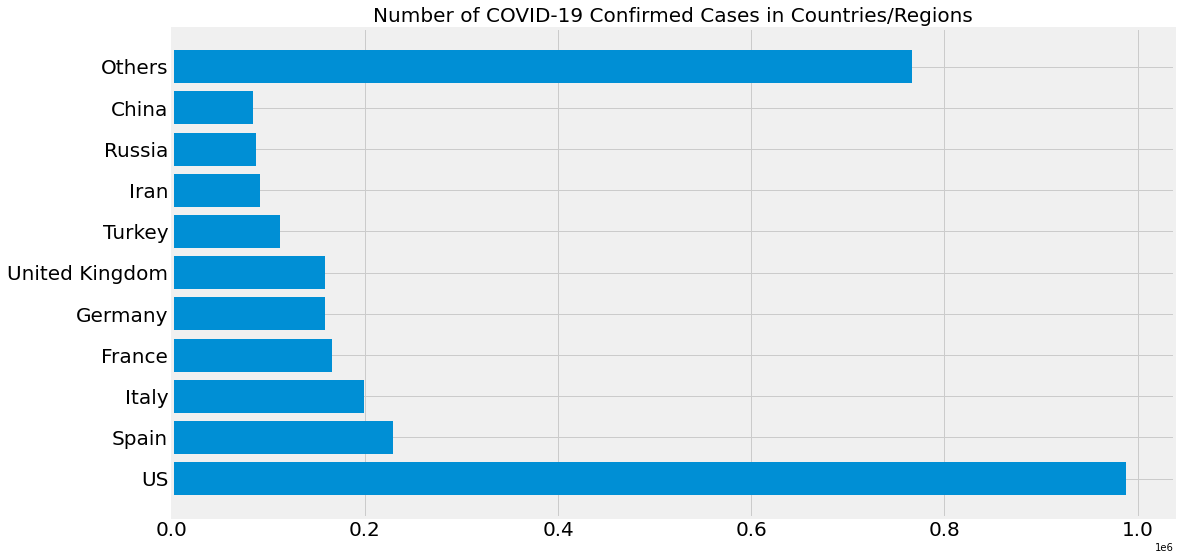

In [275]:
plot_bar_graph(visual_unique_countries, visual_confirmed_cases, 'Number of COVID-19 Confirmed Cases in Countries/Regions')

In [276]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()), k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

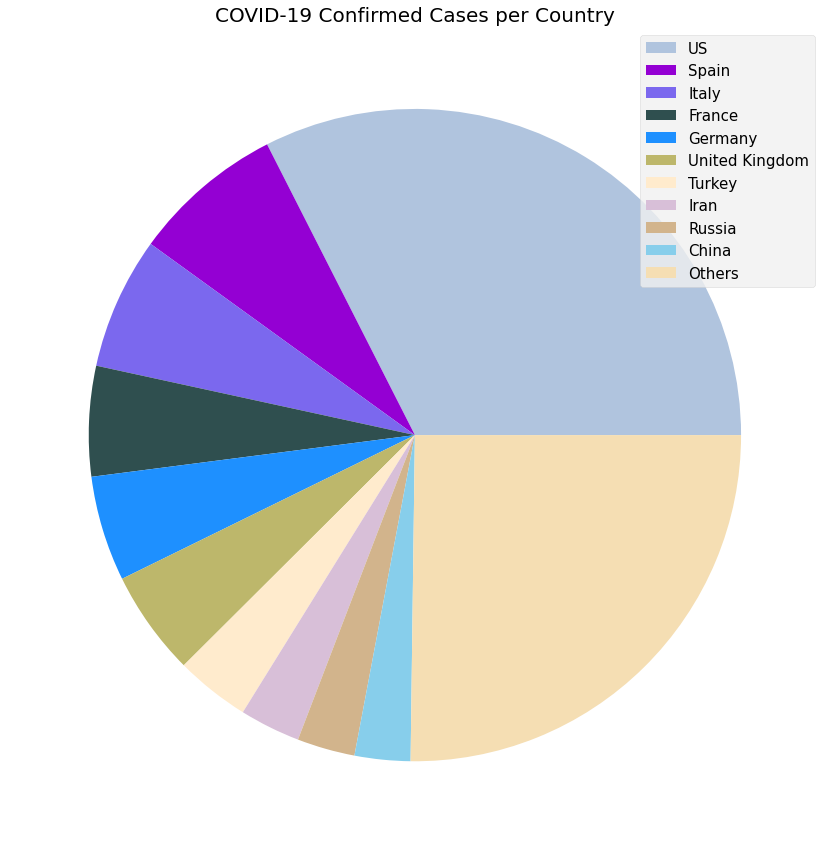

In [277]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'COVID-19 Confirmed Cases per Country')

# Predictions

In [278]:
# convert data into a numpy array consisting of 1 element per row
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
total_recovered[0:5]

array([[28],
       [30],
       [36],
       [39],
       [52]], dtype=int64)

In [279]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-20]

In [280]:
# convert all integers into datetime values for better visualization
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime("%m/%d/%Y"))
    
future_forecast_dates[0:5]

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020']

In [281]:
# split our data into training and testing
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.25, shuffle=False)
print(X_train_confirmed[0:5])
print(y_train_confirmed[0:5])

[[0]
 [1]
 [2]
 [3]
 [4]]
[[ 555]
 [ 654]
 [ 941]
 [1434]
 [2118]]


In [282]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [283]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
# match the days to the total cases
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
# predict the total cases based on testing days
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
# predict the future forecast
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE: ', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE: ', mean_squared_error(test_linear_pred, y_test_confirmed))

MAE:  172343.8762678783
MSE:  54097652301.73194


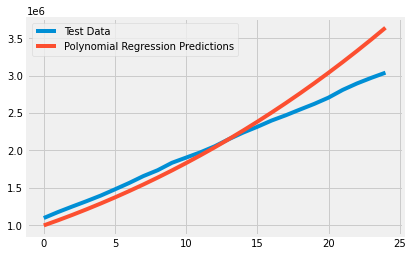

In [284]:
plt.plot(y_test_confirmed) # blue
plt.plot(test_linear_pred) # red
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [285]:
# try to do prediction with svm
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=5, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forecast)

C:\Users\Dharmik\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MAE:  265489.6552454628
MSE:  139718600180.29932


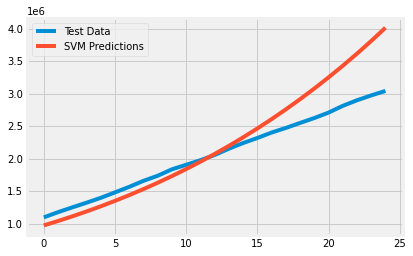

In [286]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE: ', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE: ', mean_squared_error(svm_test_pred, y_test_confirmed))

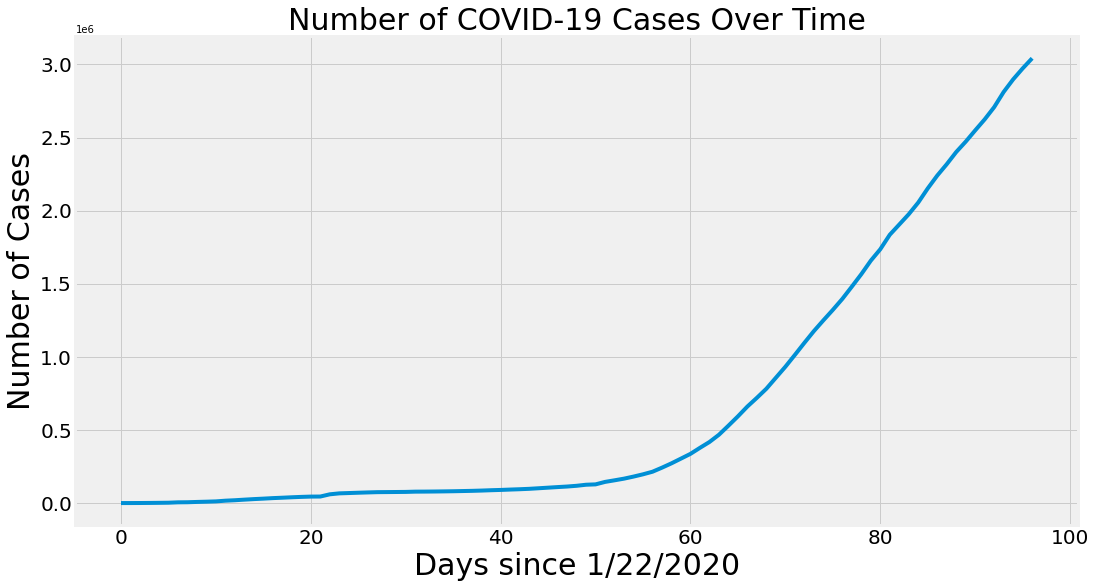

In [291]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of COVID-19 Cases Over Time', size=30)
plt.xlabel('Days since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()